# Mosquitos Detector
An image processing tool to detect small objects like mosquitos in a picture

## Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2 as cv
DATA_PATH = os.environ.get('AML_MOSQUITOS', '../dataset') # please see the README.md for more information

In [2]:
df = pd.read_csv(os.path.join(DATA_PATH, 'phase2_train_v0.csv'))
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_fName    10357 non-null  object
 1   img_w        10357 non-null  int64 
 2   img_h        10357 non-null  int64 
 3   bbx_xtl      10357 non-null  int64 
 4   bbx_ytl      10357 non-null  int64 
 5   bbx_xbr      10357 non-null  int64 
 6   bbx_ybr      10357 non-null  int64 
 7   class_label  10357 non-null  object
dtypes: int64(6), object(2)
memory usage: 647.4+ KB
None


,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr
count,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000
mean,2039.716327,2470.491165,666.723665,888.180747,1329.851598,1565.899874
std,1174.279458,1357.607784,512.257577,645.378322,793.415092,903.023984
min,139.000000,106.000000,0.000000,0.000000,128.000000,85.000000
25%,1024.000000,1109.000000,276.000000,394.000000,640.000000,761.000000
50%,1844.000000,2208.000000,502.000000,677.000000,1153.000000,1337.000000
75%,3024.000000,4000.000000,987.000000,1350.000000,1880.000000,2304.000000
max,9280.000000,12000.000000,3977.000000,5459.000000,7327.000000,7601.000000


In [3]:
df.head(3)

,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label
0,train_00000.jpeg,2448,3264,1301,1546,1641,2096,albopictus
1,train_00001.jpeg,3024,4032,900,1897,1950,2990,albopictus
2,train_00002.jpeg,768,1024,220,58,659,808,albopictus


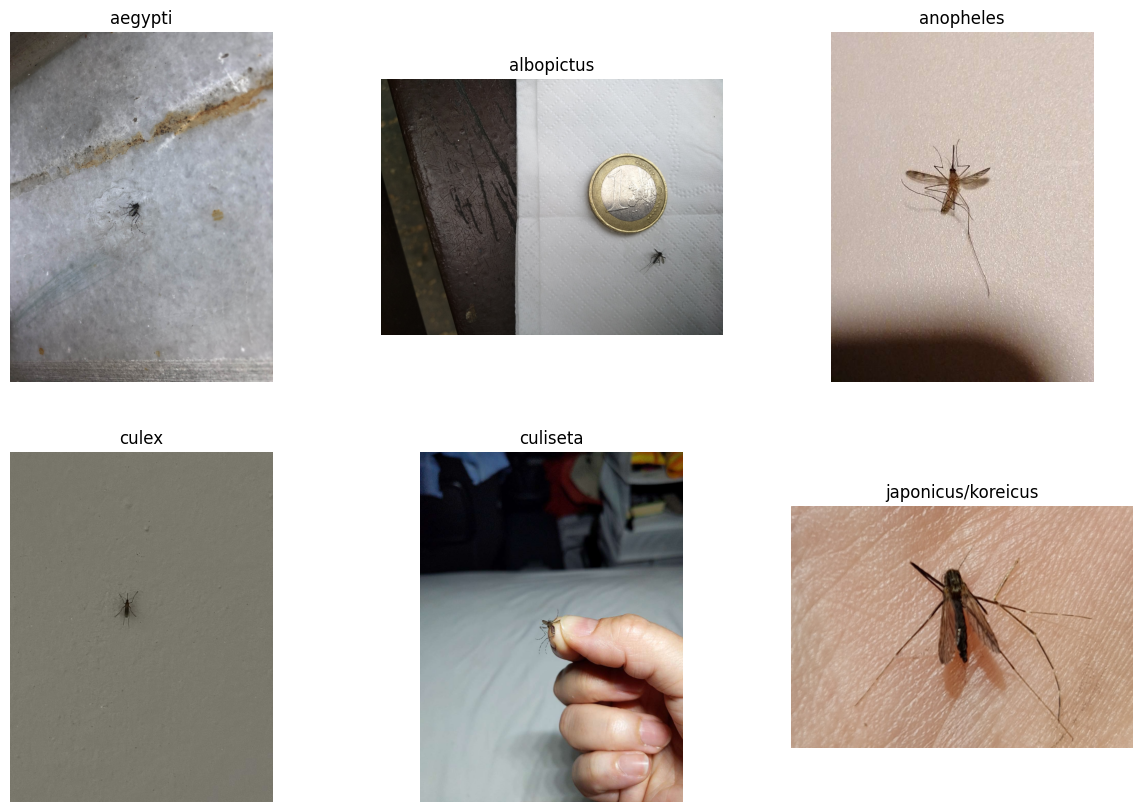

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, (idx, row) in enumerate(df.groupby('class_label').sample(1).iterrows()):
    img = cv.cvtColor(cv.imread(os.path.join(DATA_PATH,'final', row['img_fName'])), cv.COLOR_BGR2RGB)
    label = row['class_label']
    ax = axs[i//3, i%3]
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

<Axes: xlabel='count', ylabel='class_label'>

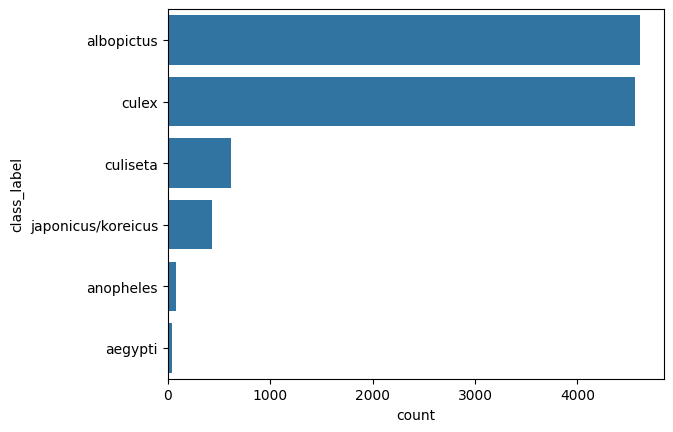

In [5]:
sns.countplot(y='class_label', data=df, order=df['class_label'].value_counts().index)

## DIP

img_fName      train_00005.jpeg
img_w                      1152
img_h                      2560
bbx_xtl                     198
bbx_ytl                     798
bbx_xbr                     954
bbx_ybr                    1351
class_label          albopictus
Name: 5, dtype: object


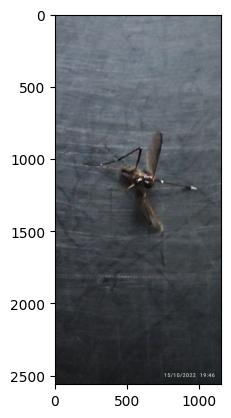

In [19]:
sample = df.iloc[5]
print(sample) # print the sample
image = cv.cvtColor(cv.imread(os.path.join(DATA_PATH,'final', sample['img_fName'])), cv.COLOR_BGR2RGB)
plt.imshow(image)